In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,make_scorer, f1_score as sklearn_f1_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [42]:
df=pd.read_csv('data.csv')
df

,id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concacivity,...,perimeter3,area3,smoothness3,compactness3,concavity3,concavepoints3,symmetry3,fractaldimension3,tumour,lymphnode
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [43]:
df.isnull().any()

id                   False
outcome              False
time                 False
radius               False
texture              False
perimeter            False
area                 False
smoothness           False
compactness          False
concacivity          False
concavepoints        False
symmetry             False
fractaldimension     False
radius2              False
texture2             False
perimeter2           False
area2                False
smoothness2          False
compactness2         False
concavepoints2       False
concavity2           False
symmetry2            False
fractaldimension2    False
radius3              False
texture3             False
perimeter3           False
area3                False
smoothness3          False
compactness3         False
concavity3           False
concavepoints3       False
symmetry3            False
fractaldimension3    False
tumour               False
lymphnode            False
dtype: bool

In [44]:
df.drop(['id','lymphnode'],axis = 'columns',inplace=True)

In [45]:
prognosis = df['outcome'].value_counts()
prognosis

N    151
R     47
Name: outcome, dtype: int64

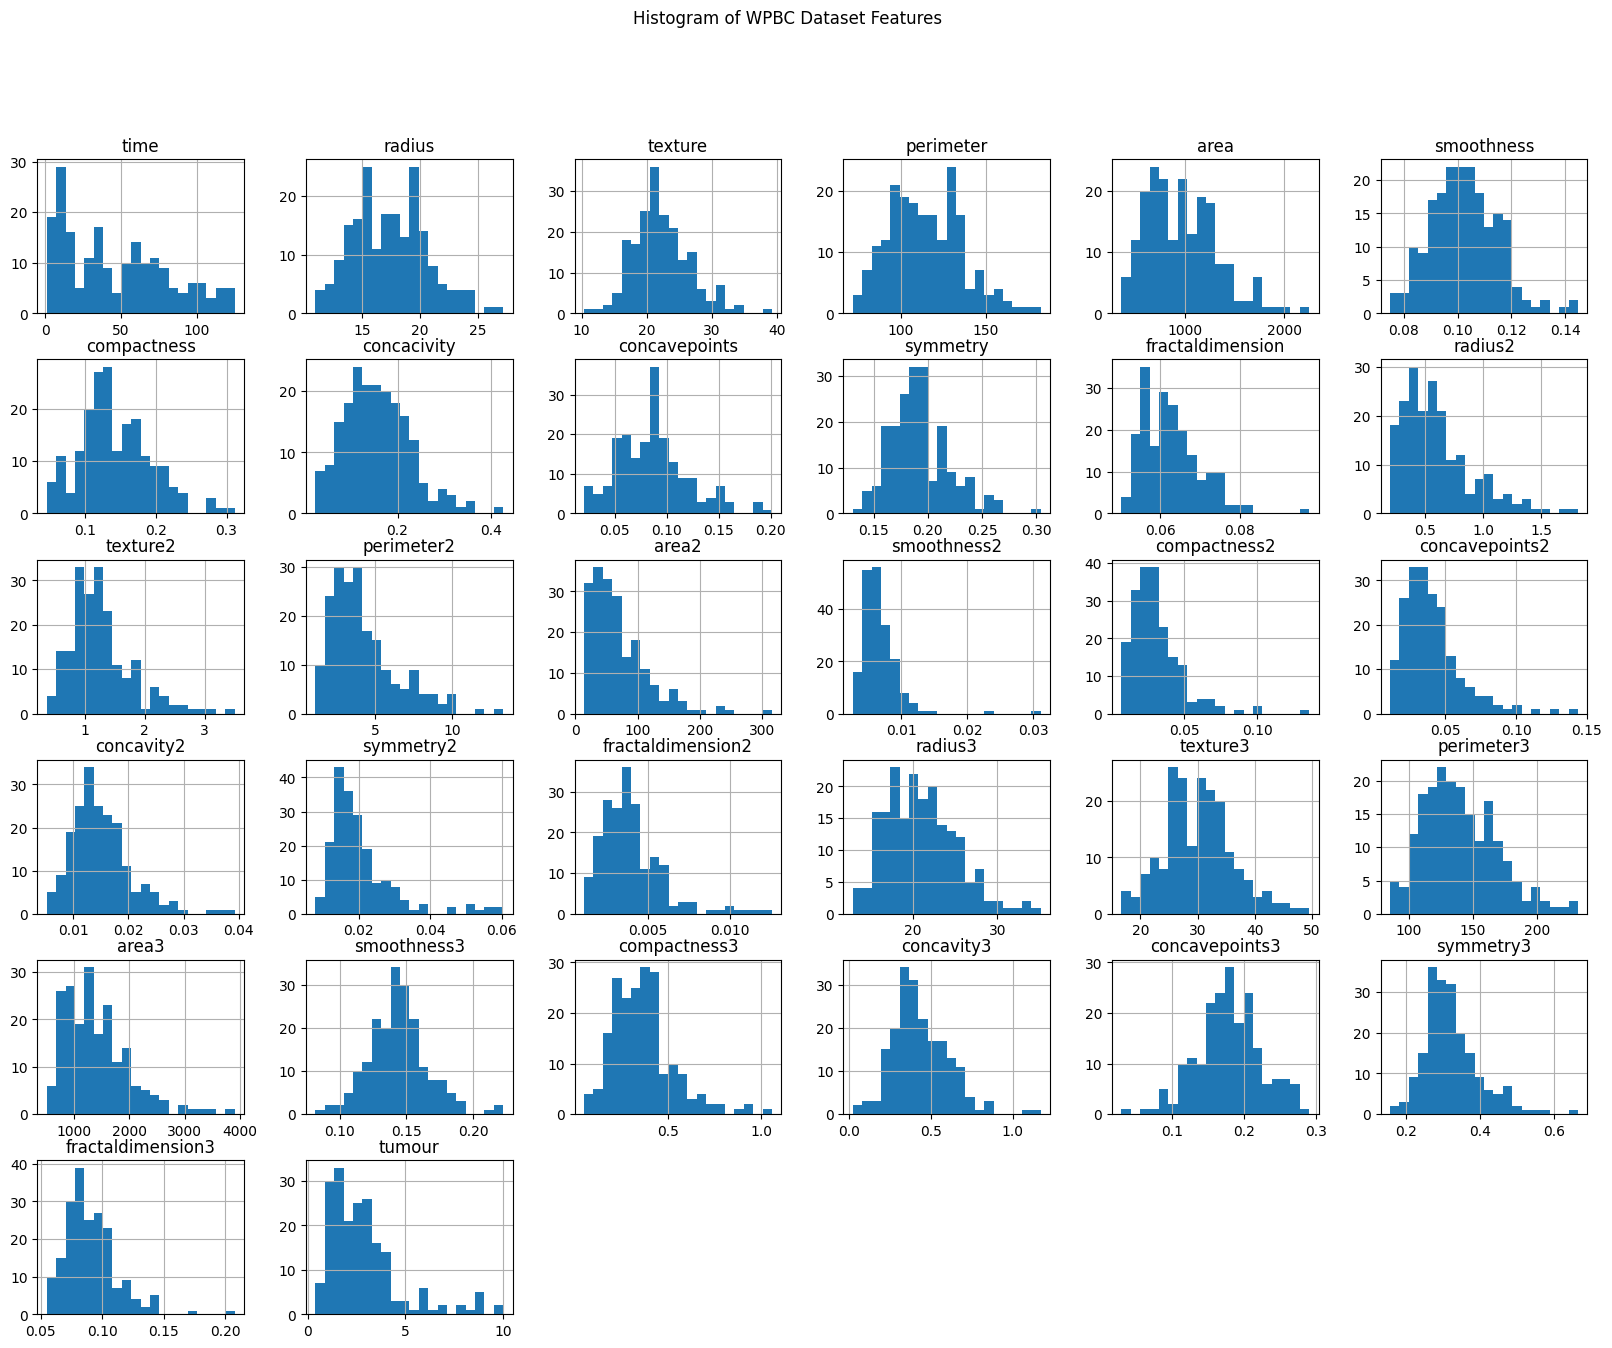

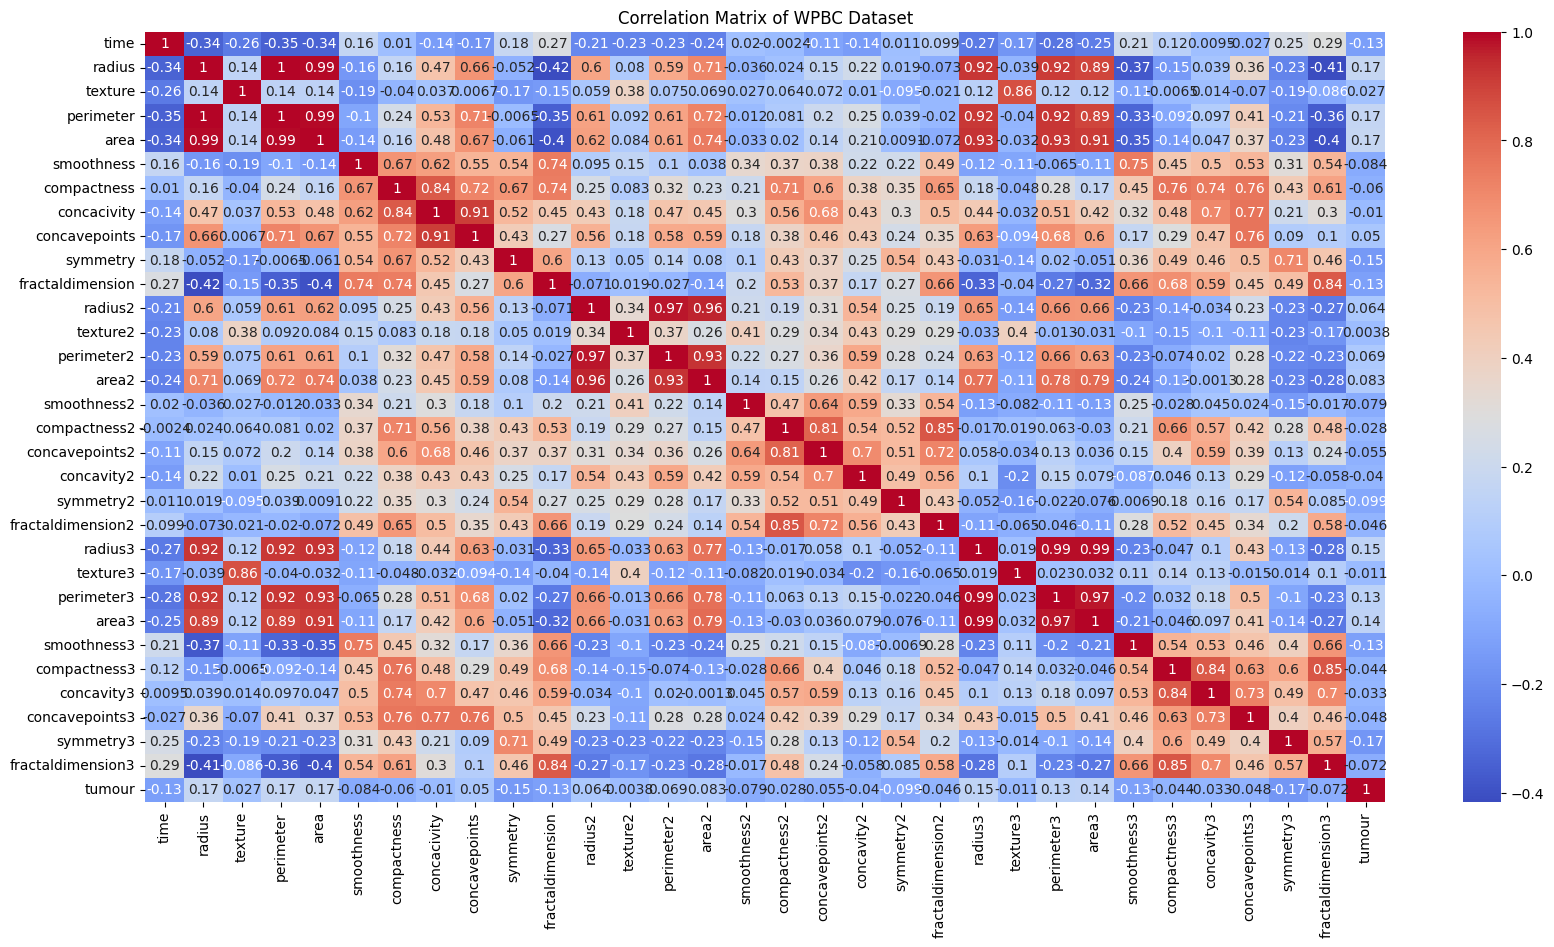

In [46]:
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogram of WPBC Dataset Features')
plt.show()

plt.figure(figsize=(20, 10))
wpbc_corr_matrix = df.corr()
sns.heatmap(wpbc_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of WPBC Dataset')
plt.show()

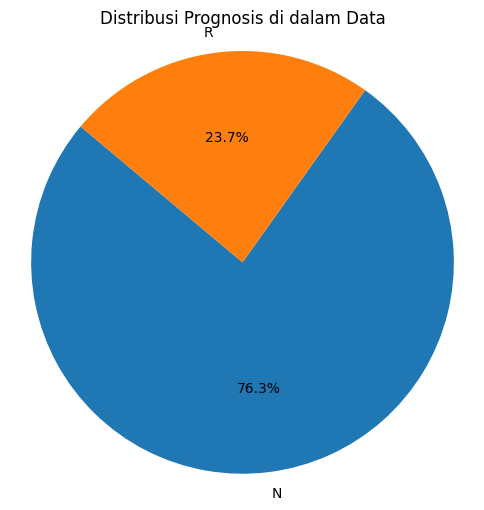

In [47]:
labels = prognosis.index
sizes = prognosis.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Prognosis di dalam Data')
plt.axis('equal')
plt.show()

In [48]:
X = df.drop(columns=['outcome'])
y = df['outcome']
df

,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concacivity,concavepoints,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concavepoints3,symmetry3,fractaldimension3,tumour
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0
194,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5
195,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7
196,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,...,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0


In [49]:
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [50]:
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True)

In [51]:
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [52]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
score=[]

In [53]:
s=[]
s.append('Logistic Regression      ')
s.append(accuracy_score(y_test, lr_pred))
s.append(precision_score(y_test, lr_pred))
s.append(recall_score(y_test, lr_pred))
s.append(sklearn_f1_score(y_test, lr_pred))
score.append(s)

In [54]:
s=[]
s.append('K-Nearest Neighbour       ')
s.append(accuracy_score(y_test, knn_pred))
s.append(precision_score(y_test, knn_pred))
s.append(recall_score(y_test, knn_pred))
s.append(sklearn_f1_score(y_test, knn_pred))
score.append(s)

In [55]:
print('Model\t\t\t\tAccuracy\tPrecision\tRecall\t\tF1-score')
for s in score:
    for i in s:
        if(type(i)!=str):
            print('{:.3f}'.format(i), end='\t\t')
        else:
            print(i, end='\t')
    print()

Model				Accuracy	Precision	Recall		F1-score
Logistic Regression      	0.875		1.000		0.375		0.545		
K-Nearest Neighbour       	0.875		0.800		0.500		0.615		


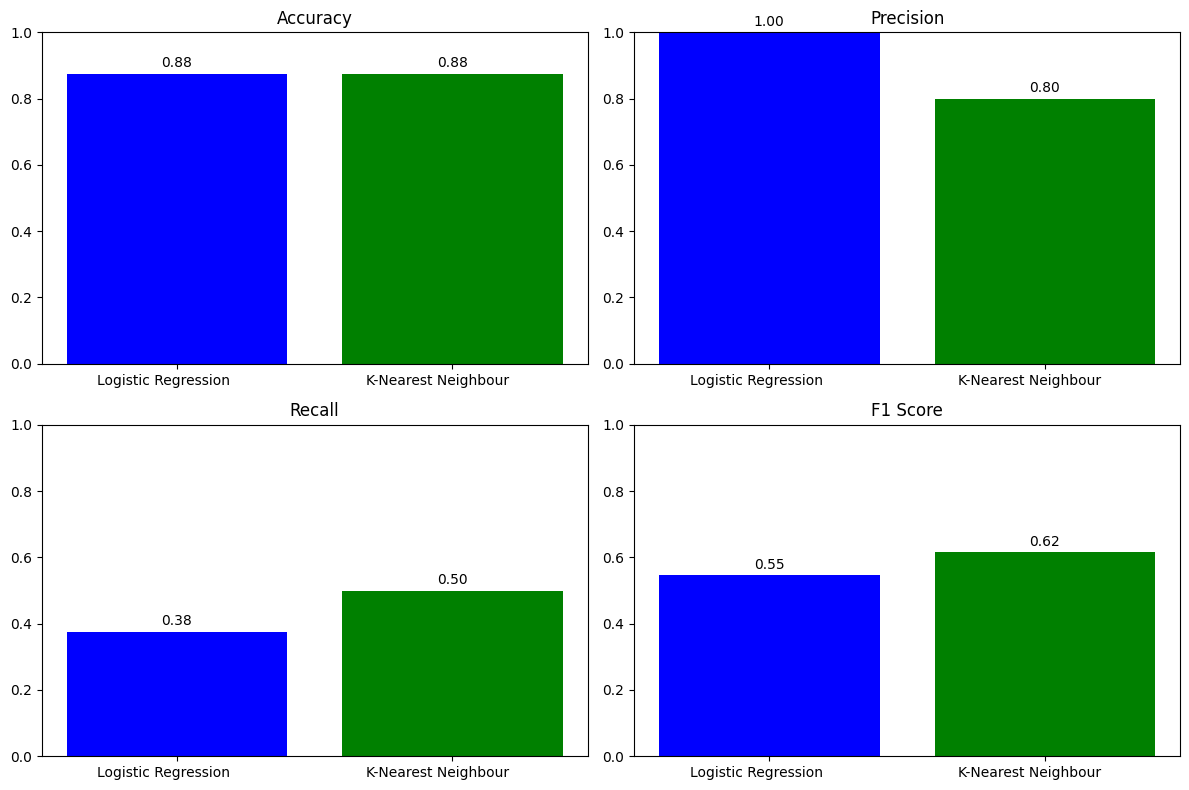

In [56]:
score_df = pd.DataFrame(score, columns=['Model'] + metrics)

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(score_df['Model'], score_df[metric], color=['blue', 'green'])
    plt.title(metric)
    plt.ylim(0, 1)
    for j in range(len(score_df)):
        plt.text(j, score_df[metric][j] + 0.02, f'{score_df[metric][j]:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [57]:
print("X_train",np.shape(X_train))
print("y_train",np.shape(y_train))
print("X_test",np.shape(X_test))
print("y_test",np.shape(y_test))
X_train=np.asarray(X_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)

X_train (158, 32)
y_train (158,)
X_test (40, 32)
y_test (40,)


In [58]:
# Definisikan fungsi pembangun model
def build_model(units1=32, units2=16, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(units=units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [59]:
# Buat KerasClassifier
model = KerasClassifier(build_fn=build_model, verbose=0)

# Definisikan parameter grid search
param_grid = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'batch_size': [10, 20, 40],
    'epochs': [50, 100],
    'learning_rate': [0.01, 0.001, 0.0001]
}

# Skorer kustom untuk GridSearchCV menggunakan F1-score
scorer = make_scorer(sklearn_f1_score, greater_is_better=True)

# Buat GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, n_jobs=-1, cv=3)

num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

validation_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []
best_folds = []
best_parameters = []


C:\Users\gremlin\AppData\Local\Temp\ipykernel_14228\1982632307.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


Training on fold 1...


2/2 [==============================] - 0s 2ms/step
Validation F1-score for fold 1: 0.5714285714285714
  Precision: 0.8
  Recall: 0.4444444444444444
  F1-score: 0.5714285714285714
  Accuracy: 0.85
Confusion Matrix:
[[30  1]
 [ 5  4]]




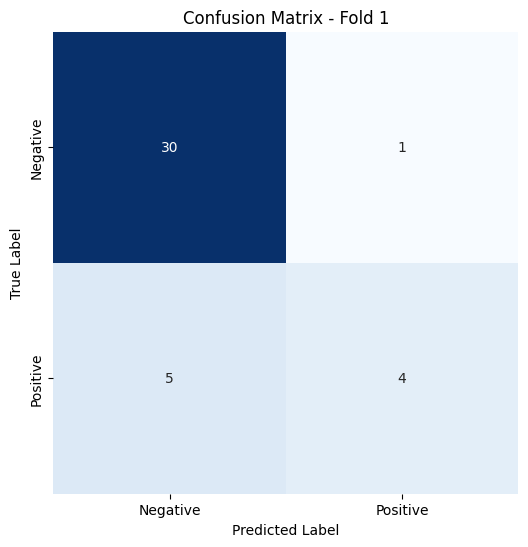

Training on fold 2...
2/2 [==============================] - 0s 997us/step
Validation F1-score for fold 2: 0.7777777777777778
  Precision: 0.875
  Recall: 0.7
  F1-score: 0.7777777777777778
  Accuracy: 0.9
Confusion Matrix:
[[29  1]
 [ 3  7]]




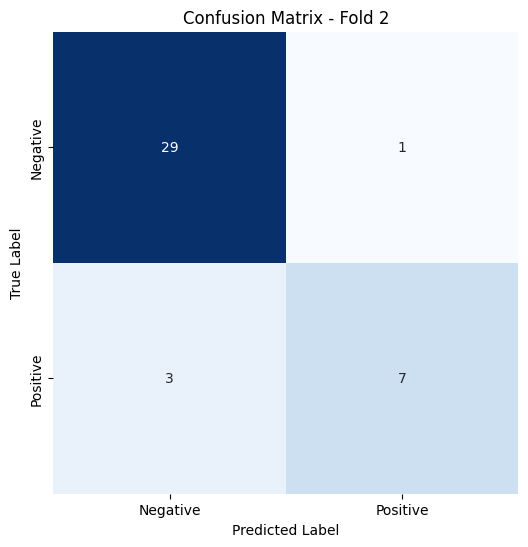

Training on fold 3...
2/2 [==============================] - 0s 1ms/step
Validation F1-score for fold 3: 0.5
  Precision: 0.6666666666666666
  Recall: 0.4
  F1-score: 0.5
  Accuracy: 0.8
Confusion Matrix:
[[28  2]
 [ 6  4]]




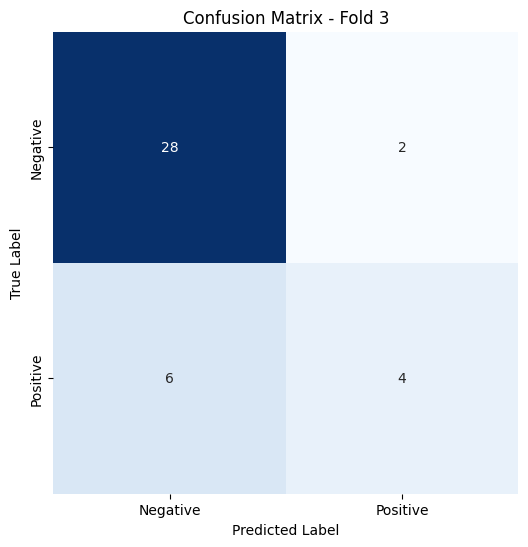

Training on fold 4...
2/2 [==============================] - 0s 2ms/step
Validation F1-score for fold 4: 0.2608695652173913
  Precision: 0.21428571428571427
  Recall: 0.3333333333333333
  F1-score: 0.2608695652173913
  Accuracy: 0.5641025641025641
Confusion Matrix:
[[19 11]
 [ 6  3]]




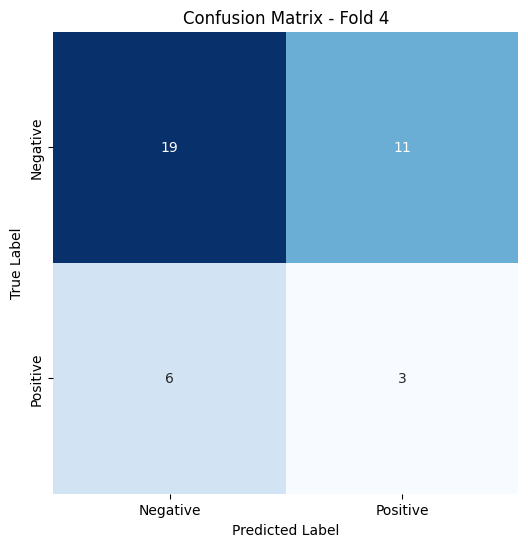

Training on fold 5...
2/2 [==============================] - 0s 997us/step
Validation F1-score for fold 5: 0.35294117647058826
  Precision: 0.375
  Recall: 0.3333333333333333
  F1-score: 0.35294117647058826
  Accuracy: 0.717948717948718
Confusion Matrix:
[[25  5]
 [ 6  3]]




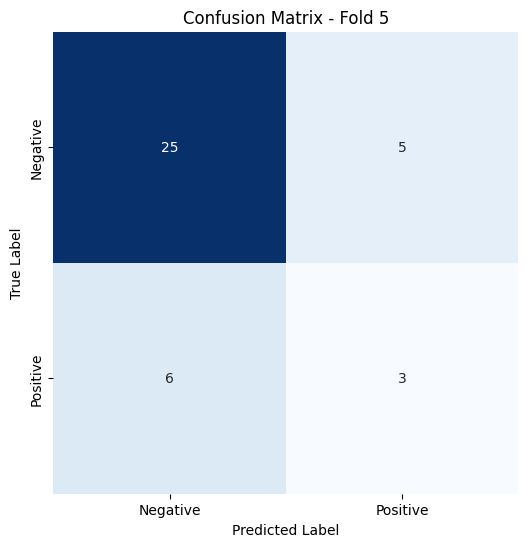

In [60]:
for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    print(f"Training on fold {fold}...")
    
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    grid_result = grid.fit(X_train_fold, y_train_fold)
    best_model = grid_result.best_estimator_
    
    y_val_pred = (best_model.predict(X_val_fold) > 0.5).astype("int32")
    
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = sklearn_f1_score(y_val_fold, y_val_pred)
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    
    validation_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    conf_matrices.append(conf_matrix)

    
    #melacak best folds dan best parameter
    best_folds.append((fold, f1))
    best_parameters.append((fold, grid_result.best_params_))
    print(f"Validation F1-score for fold {fold}: {f1}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    print(f"  Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



In [61]:
#menghitung hasil rata-rata dari semua folds
mean_f1 = np.mean(f1_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_conf_matrix = np.mean(conf_matrices, axis=0)

print(f"Mean validation F1 score across all folds: {mean_f1}")

#bestfolds
best_fold = max(best_folds, key=lambda x: x[1])
print(f"Best fold: {best_fold[0]} with F1 score: {best_fold[1]}")
print(f"Best parameters for the best fold: {best_parameters[best_fold[0] - 1][1]}")

Mean validation F1 score across all folds: 0.49260341817886577
Best fold: 2 with F1 score: 0.7777777777777778
Best parameters for the best fold: {'batch_size': 10, 'epochs': 50, 'learning_rate': 0.001, 'units1': 64, 'units2': 64}
